In [4]:
import tensorflow as tf
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SequentialFeatureSelector
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from kerastuner.tuners import RandomSearch
#from imblearn.over_sampling import SMOTE

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./merged_data.csv')
df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,daynight,type,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,elevation,slope,aspect
0,39.437763,20.607416,332.24,0.53,0.50,01-01-17,01:17:37,N,VIIRS,n,...,D,0,5.8,-3.6,0.2,0.0,7.3,158,13.834286,9.590237
1,40.636646,22.821739,338.54,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.6,-1.9,1.8,0.0,14.8,7,0.927410,0.000000
2,40.664516,22.654505,325.05,0.40,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.2,-3.6,0.7,0.0,13.0,17,2.212763,146.918335
3,40.602314,22.800253,325.55,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.5,-1.1,2.2,0.0,15.5,11,2.588685,110.980041
4,40.616047,22.824442,337.78,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,3,7.5,-1.1,2.2,0.0,15.5,3,4.420020,326.896881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27571,38.564995,23.295425,303.13,0.43,0.62,24-12-21,01:38:44,N,VIIRS,n,...,N,3,13.2,-0.7,5.3,0.0,8.7,12,3.889000,17.730814
27572,40.282234,23.445150,302.38,0.36,0.57,25-12-21,01:01:46,N,VIIRS,n,...,N,2,12.9,2.3,6.4,0.0,10.8,28,4.938560,280.797638
27573,38.564800,23.295584,329.24,0.43,0.38,27-12-21,01:00:30,N,VIIRS,n,...,N,3,17.6,9.6,13.2,0.3,19.1,27,3.704792,180.000000
27574,37.919277,23.072912,299.74,0.43,0.38,27-12-21,01:00:30,N,VIIRS,n,...,N,2,18.5,8.6,13.4,0.0,12.0,24,2.195117,327.632935


In [7]:
target = df['type']
target

0        0
1        0
2        0
3        0
4        3
        ..
27571    3
27572    2
27573    3
27574    2
27575    0
Name: type, Length: 27576, dtype: int64

In [8]:
target.replace({0: 1, 1: 0, 2: 0,3:0},inplace=True)
target

0        1
1        1
2        1
3        1
4        0
        ..
27571    0
27572    0
27573    0
27574    0
27575    1
Name: type, Length: 27576, dtype: int64

In [8]:
#replace 1 with "Fire" and 0 with "No Fire" 
target.replace({1: "Fire", 0: "No Fire"},inplace=True)
target

0           Fire
1           Fire
2           Fire
3           Fire
4        No Fire
          ...   
27571    No Fire
27572    No Fire
27573    No Fire
27574    No Fire
27575       Fire
Name: type, Length: 27576, dtype: object

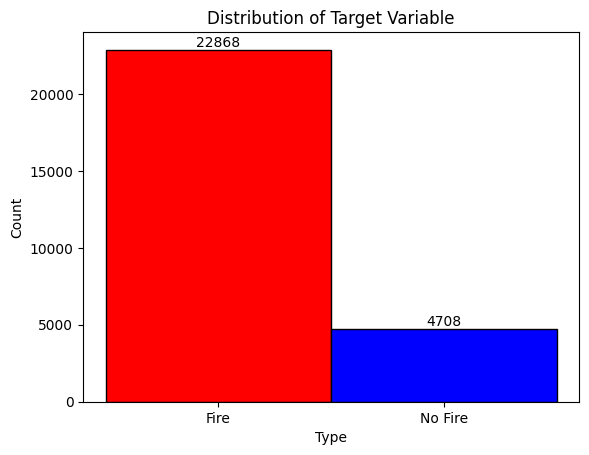

In [20]:
#add gap between bars and add number on top of bars
sns_hist = sns.histplot(target, stat='count', discrete=True)
plt.title('Distribution of Target Variable') 
plt.xlabel('Type')

colors = ['red', 'blue']
for i, bar in enumerate(sns_hist.patches):
    bar.set_color(colors[i])
    bar.set_edgecolor('black') 
    bar.set_linewidth(1)

sns_hist.bar_label(sns_hist.containers[0])
plt.show()

In [4]:
if tf.test.is_gpu_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [5]:
!nvidia-smi

Thu May 30 22:30:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB  WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P5              10W / 180W |    705MiB /  6144MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# ***Data Preprocessing***

In [10]:
# Load the dataset
data = pd.read_csv('./merged_data.csv')#r'C:\Users\Ιωαννης\Desktop\Thesis\code\merged_data.csv'
data

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,daynight,type,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,elevation,slope,aspect
0,39.437763,20.607416,332.24,0.53,0.50,01-01-17,01:17:37,N,VIIRS,n,...,D,0,5.8,-3.6,0.2,0.0,7.3,158,13.834286,9.590237
1,40.636646,22.821739,338.54,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.6,-1.9,1.8,0.0,14.8,7,0.927410,0.000000
2,40.664516,22.654505,325.05,0.40,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.2,-3.6,0.7,0.0,13.0,17,2.212763,146.918335
3,40.602314,22.800253,325.55,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,0,7.5,-1.1,2.2,0.0,15.5,11,2.588685,110.980041
4,40.616047,22.824442,337.78,0.39,0.44,01-01-17,01:17:37,N,VIIRS,n,...,D,3,7.5,-1.1,2.2,0.0,15.5,3,4.420020,326.896881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27571,38.564995,23.295425,303.13,0.43,0.62,24-12-21,01:38:44,N,VIIRS,n,...,N,3,13.2,-0.7,5.3,0.0,8.7,12,3.889000,17.730814
27572,40.282234,23.445150,302.38,0.36,0.57,25-12-21,01:01:46,N,VIIRS,n,...,N,2,12.9,2.3,6.4,0.0,10.8,28,4.938560,280.797638
27573,38.564800,23.295584,329.24,0.43,0.38,27-12-21,01:00:30,N,VIIRS,n,...,N,3,17.6,9.6,13.2,0.3,19.1,27,3.704792,180.000000
27574,37.919277,23.072912,299.74,0.43,0.38,27-12-21,01:00:30,N,VIIRS,n,...,N,2,18.5,8.6,13.4,0.0,12.0,24,2.195117,327.632935


In [11]:
timestamps = data['acq_time']

def getCosSinHour(df):

    date = pd.to_datetime(data['acq_date'] +'T'+ data['acq_time'])

    hour = date.dt.hour

    cos_hour = np.cos(2 * np.pi * hour/24)
    sin_hour = np.sin(2 * np.pi * hour/24)

    return cos_hour, sin_hour

cos_hour, sin_hour = getCosSinHour(data)
# data['cos_hour'] = cos_hour
# data['sin_hour'] = sin_hour

#convert daynight to 1 and 0 and drop unwanted rows in that column
#convert every element in daynight to int is possible


#convert every element in daynight to int is possible
data['daynight'] = data['daynight'].apply(lambda x: int(x) if x.isdigit() else x)

data['daynight'] = data['daynight'].replace('D', 1)
data['daynight'] = data['daynight'].replace('N', 0)

C:\Users\johnp\AppData\Local\Temp\ipykernel_14708\3025444905.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date = pd.to_datetime(data['acq_date'] +'T'+ data['acq_time'])
C:\Users\johnp\AppData\Local\Temp\ipykernel_14708\3025444905.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['daynight'] = data['daynight'].replace('N', 0)


In [12]:
target = data['type']
dropped_data = data.drop(['longitude','latitude','acq_date','acq_time','satellite','instrument','type','confidence','version','precipitation_sum','frp'], axis=1)#,'daynight'
dropped_data

,bright_ti4,scan,track,bright_ti5,daynight,temperature_2m_max,temperature_2m_min,temperature_2m_mean,wind_speed_10m_max,elevation,slope,aspect
0,332.24,0.53,0.50,281.34,1,5.8,-3.6,0.2,7.3,158,13.834286,9.590237
1,338.54,0.39,0.44,282.04,1,7.6,-1.9,1.8,14.8,7,0.927410,0.000000
2,325.05,0.40,0.44,283.51,1,7.2,-3.6,0.7,13.0,17,2.212763,146.918335
3,325.55,0.39,0.44,282.50,1,7.5,-1.1,2.2,15.5,11,2.588685,110.980041
4,337.78,0.39,0.44,283.22,1,7.5,-1.1,2.2,15.5,3,4.420020,326.896881
...,...,...,...,...,...,...,...,...,...,...,...,...
27571,303.13,0.43,0.62,279.30,0,13.2,-0.7,5.3,8.7,12,3.889000,17.730814
27572,302.38,0.36,0.57,274.80,0,12.9,2.3,6.4,10.8,28,4.938560,280.797638
27573,329.24,0.43,0.38,281.70,0,17.6,9.6,13.2,19.1,27,3.704792,180.000000
27574,299.74,0.43,0.38,285.68,0,18.5,8.6,13.4,12.0,24,2.195117,327.632935


In [13]:
target.replace({0: 1, 1: 0, 2: 0,3:0},inplace=True)
target

0        1
1        1
2        1
3        1
4        0
        ..
27571    0
27572    0
27573    0
27574    0
27575    1
Name: type, Length: 27576, dtype: int64

In [37]:
dropped_data.shape

(27576, 13)

In [8]:

# x_train_reshaped = np.expand_dims(dropped_data.values, axis=1)


# n_samples, timesteps, n_features = x_train_reshaped.shape
# x_train_reshaped_2d = x_train_reshaped.reshape(n_samples, timesteps * n_features)

# Apply SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(dropped_data, target)

# Reshape back to 3D
#x_train_balanced = x_train_balanced.reshape(-1, timesteps, n_features)

# Verify the new shape
print("Balanced x_train shape:", x_train_balanced.shape)
print("Balanced y_train shape:", y_train_balanced.shape)

x_train, x_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=42,stratify=y_train_balanced)
x_train,x_val,y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42,stratify=y_train)

Balanced x_train shape: (45736, 11)
Balanced y_train shape: (45736,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(dropped_data,target, test_size=0.2, random_state=42,stratify=target)
x_train,x_val,y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42,stratify=y_train)

In [15]:
#save the scalers
scalers = {}

for column in x_train.columns:
    scaler = MinMaxScaler()
    x_train[[column]] = scaler.fit_transform(x_train[[column]])
    scalers[column] = scaler

for column, scaler in scalers.items():
    joblib.dump(scaler, f"{column}_scaler.pkl")

In [16]:
# Load the saved scalers
scalers = {}
for column in x_train.columns:

    if column == 'daynight':
        continue
    scaler = joblib.load(f"{column}_scaler.pkl")
    scalers[column] = scaler

# Transform the validation and test features using the loaded scalers
x_val_scaled = x_val.copy()  
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()  
for column, scaler in scalers.items():
    x_train_scaled[[column]] = scaler.transform(x_train[[column]])
    x_val_scaled[[column]] = scaler.transform(x_val[[column]])
    x_test_scaled[[column]] = scaler.transform(x_test[[column]])

In [17]:
x_train_scaled

,bright_ti4,scan,track,bright_ti5,daynight,temperature_2m_max,temperature_2m_min,temperature_2m_mean,wind_speed_10m_max,elevation,slope,aspect
15514,-1.302332,1.286458,1.467120,-1.918264,1.0,-0.051336,0.200557,0.063349,-0.076341,0.001788,0.004313,0.000502
26766,-1.302734,-0.276042,-0.800454,-1.917511,1.0,-0.050547,0.199900,0.063051,-0.072289,0.001781,0.000510,0.001657
2599,-1.302954,0.157986,0.843537,-1.918204,1.0,-0.050790,0.199243,0.062827,-0.075098,0.001797,0.004799,0.001203
26957,-1.303049,0.418403,-0.460317,-1.917413,1.0,-0.051093,0.200064,0.063125,-0.073348,0.001739,0.005952,0.002502
9806,-1.302990,-0.362847,-0.403628,-1.918519,1.0,-0.056189,0.188488,0.054690,-0.077769,0.001808,0.001413,0.000840
...,...,...,...,...,...,...,...,...,...,...,...,...
23888,-1.304326,1.373264,1.523810,-1.918686,0.0,-0.048606,0.202199,0.065738,-0.077262,0.001713,0.001501,0.000000
459,-1.303321,-0.319444,-0.800454,-1.918282,1.0,-0.057767,0.189227,0.054391,-0.079887,0.001663,0.000712,0.001816
23217,-1.301887,-0.319444,-0.403628,-1.917622,0.0,-0.052185,0.198094,0.061558,-0.075236,0.001715,0.002425,0.000998
2767,-1.301887,-0.362847,0.446712,-1.918031,1.0,-0.048909,0.201952,0.065663,-0.075651,0.001701,0.003850,0.000959


# ***Model Training***

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [11]:
np.__version__#'1.21.5'

'1.19.5'

In [46]:
!pip install -Iv numpy==1.19.5 --user

Using pip 22.3.1 from F:\anaconda3\envs\tf_gpu\lib\site-packages\pip (python 3.7)


  Link requires a different Python (3.7.16 not in: '>=3.8'): https://files.pythonhosted.org/packages/50/e1/9b0c184f04b8cf5f3c941ffa56fbcbe936888bdac9aa7ba6bae405ac752b/numpy-1.22.0.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.8)


  Link requires a different Python (3.7.16 not in: '>=3.8'): https://files.pythonhosted.org/packages/0a/c8/a62767a6b374a0dfb02d2a0456e5f56a372cdd1689dbc6ffb6bf1ddedbc0/numpy-1.22.1.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.8)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Link requires a different Python (3.7.16 not in: '>=3.8'): https://files.pythonhosted.org/packages/e9/6c/c0a8130fe198f27bab92f1b28631e0cc2572295f6b7a31e87efe7448aa1c/numpy-1.22.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.8)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


  Link requires a different Python (3.7.16 not in: '>=3.8'): https://files.pythonhosted.org/packages/64/4a/b008d1f8a7b9f5206ecf70a53f84e654707e7616a771d84c05151a4713e9/numpy-1.22.3.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.8)

tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.

In [27]:
### LSTM
def reshape_data_for_lstm(x_train, x_test_scaled, x_val_scaled):
    x_train_array = x_train.values
    x_train_reshaped = np.expand_dims(x_train_array, axis=1)

    x_test_array = x_test_scaled.values
    x_test_reshaped = np.expand_dims(x_test_array, axis=1)

    x_val_array = x_val_scaled.values
    x_val_reshaped = np.expand_dims(x_val_array, axis=1)

    input_shape = (1, x_train_reshaped.shape[2]) #for LSTM
    return x_train_reshaped, x_test_reshaped, x_val_reshaped, input_shape



###cnn
def reshape_data_for_cnn(x_train, x_test_scaled, x_val_scaled):
    x_train_array = x_train.values
    x_train_reshaped = np.expand_dims(x_train_array, axis=-1)

    x_test_array = x_test_scaled.values
    x_test_reshaped = np.expand_dims(x_test_array, axis=-1)

    x_val_array = x_val_scaled.values
    x_val_reshaped = np.expand_dims(x_val_array, axis=-1)

    input_shape = (x_train_reshaped.shape[1],1) #cnn
    return x_train_reshaped, x_test_reshaped, x_val_reshaped, input_shape


x_train_reshaped_lstm, x_test_reshaped_lstm, x_val_reshaped_lstm, input_shape_lstm = reshape_data_for_lstm(x_train_scaled,  x_test_scaled, x_val_scaled)

x_train_reshaped, x_test_reshaped, x_val_reshaped, input_shape = reshape_data_for_cnn(x_train_scaled, x_test_scaled, x_val_scaled)


NameError: name 'x_train_scaled' is not defined

In [28]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.regularizers import l2

#lstm
def build_model_lstm(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('input_units', min_value=32, max_value=512, step=32),
                   return_sequences=True,
                   input_shape=input_shape_lstm)) 
    model.add(BatchNormalization())

    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(units=hp.Int(f'lstm_{i}_units', min_value=32, max_value=512, step=32), return_sequences=True,kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-6, max_value=1e-2, sampling='log'))))
        model.add(BatchNormalization())

    model.add(LSTM(units=hp.Int('layer_2_neurons', min_value=32, max_value=512, step=32), return_sequences=True,kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-6, max_value=1e-2, sampling='log'))))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    #model.add(Dense(units=y_train.shape[1], activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'], default='relu')))
    model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
#cnn
def build_model_cnn(hp):
    model = Sequential()
    
    # First Conv1D layer
    model.add(Conv1D(filters=hp.Int('input_filters', min_value=32, max_value=512, step=32),
                     kernel_size=1,#hp.Int('input_kernel_size', min_value=1, max_value=7, step=2),
                     activation='relu',
                     input_shape=input_shape,
                     kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-6, max_value=1e-2, sampling='log'))))
    model.add(BatchNormalization())
    
    # Additional Conv1D layers based on n_layers
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int(f'conv_{i}_filters', min_value=32, max_value=512, step=32),
                         kernel_size=1,#hp.Int(f'conv_{i}_kernel_size', min_value=3, max_value=7, step=2),
                         activation='relu',
                         kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-6, max_value=1e-2, sampling='log'))))
        model.add(BatchNormalization())

    # Final Conv1D layer
    model.add(Conv1D(filters=hp.Int('final_conv_filters', min_value=32, max_value=512, step=32),
                     kernel_size=1,#p.Int('final_conv_kernel_size', min_value=3, max_value=7, step=2),
                     activation='relu',
                     kernel_regularizer=l2(hp.Float('l2_reg', min_value=1e-6, max_value=1e-2, sampling='log'))))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    
    # Flatten the output before passing it to Dense layers
    model.add(Flatten())
    
    # Dense layer for binary classification
    model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=3, # Stop after 5 epochs with no improvement
    mode='min', # Minimize the loss
    restore_best_weights=True # Restore the weights from the epoch with the best validation loss
)


# Set up the Keras Tuner
tuner = RandomSearch(
    build_model_lstm,
    objective='val_loss',
    max_trials=4,
    directory='./tuner',
    project_name='/lstm',
    executions_per_trial=2,
    overwrite=True
)


# Run the hyperparameter search
tuner.search(
    x=x_train_reshaped_lstm,
    y=y_train.values.reshape(-1,1),
    epochs=30,
    batch_size=32,
    validation_data=(x_test_reshaped_lstm, y_test.values.reshape(-1, 1)),
    callbacks=[early_stopping],
)

c:\Users\johnp\OneDrive\Υπολογιστής\IHU\Thesis\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
320               |320               |input_units
3                 |3                 |n_layers
256               |256               |lstm_0_units
0.0018552         |0.0018552         |l2_reg
384               |384               |layer_2_neurons
0                 |0                 |dropout_rate

Epoch 1/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8002 - loss: 0.7883 - val_accuracy: 0.8292 - val_loss: 0.4106
Epoch 2/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8291 - loss: 0.3967 - val_accuracy: 0.8292 - val_loss: 0.5587
Epoch 3/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8275 - loss: 0.3816 - val_accuracy: 0.8292 - val_loss: 0.6489
Epoch 4/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8299 - loss: 0.3709 - val_accuracy: 0.8292 - val_loss: 0.4663
Epoch 1/30
224/552 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7615 - loss: 1.0532

KeyboardInterrupt: 

In [2]:
from tensorflow.keras.models import load_model

In [8]:
model_cnn1 = load_model('models/cnn_1rst_88acc.h5')
model_cnn2 = load_model('models/cnn_daynight_89acc.h5')
model_lstm1 = load_model('models/lstm_model_89acc.h5')
model_lstm2 = load_model('models/lstm_daynight_90acc.h5')

# Models


In [96]:
best_models = tuner.get_best_models(num_models=1)[0]
tuner.get_best_models(num_models=1)[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 96)             41856     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 96)             384       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 224)            287616    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 224)            896       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 160)            246400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 160)            640       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 64)             5

In [89]:
best_models = tuner.get_best_models(num_models=1)[0]
tuner.get_best_models(num_models=1)[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 192)            156672    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 192)            768       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 512)            1443840   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512)            2048      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 224)            660352    
_________________________________________________________________
dropout (Dropout)            (None, 1, 224)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              2

In [75]:
best_models = tuner.get_best_models(num_models=1)[0]
tuner.get_best_models(num_models=1)[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 416)           832       
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 416)           1664      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 160)           66720     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 160)           640       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            10304     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 64)            256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 32)            2

In [76]:
best_models = tuner.get_best_models(num_models=1)[0]  # Specify the number of best models you want to retrieve

# Print the summary of the best model and store the model weigths to use for prediction
# model = 0
# for i in best_models:
#     print(i.summary())
#     model = i

In [46]:
x_val_reshaped.shape

(4412, 13, 1)

In [97]:
inference = best_models.evaluate(x_val_reshaped, y_val.values.reshape(-1,1))

print("loss:", inference[0])
print("accuracy:", inference[1])

4412/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

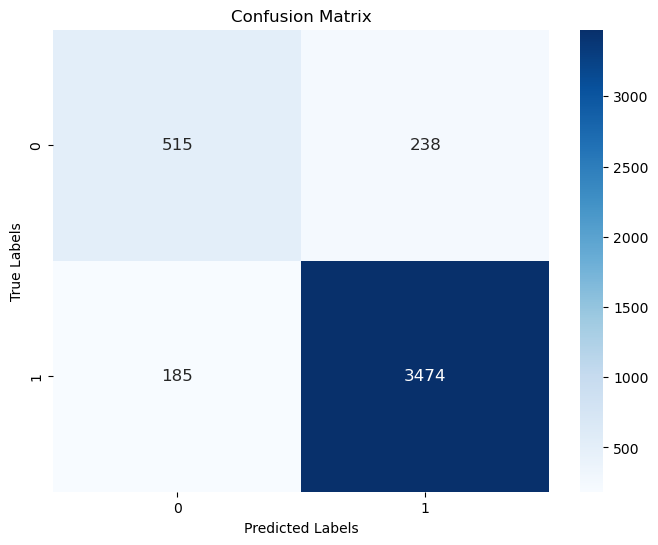

In [98]:
y_pred = best_models.predict_classes(x_val_reshaped)

# Compute the confusion matrix
cm = confusion_matrix( y_val.values.reshape(-1,1), y_pred.reshape(-1,1))# for lstm y_val.values.reshape(-1,1), y_pred.reshape(-1,1) #for cnn y_val, y_pred
 
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

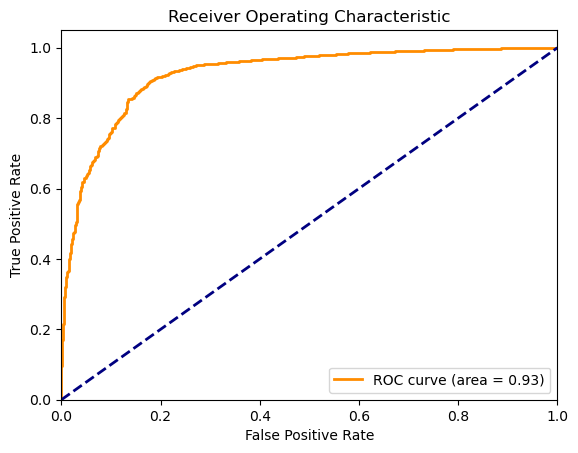

In [99]:
from sklearn.metrics import auc, roc_curve


y_pred_prob = best_models.predict(x_test_reshaped).ravel()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:
x_val.shape

(4412, 12)

In [104]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

y_pred_test = best_models.predict_classes(x_val_reshaped).reshape(-1,1)

precision = precision_score(y_val, y_pred_test)
recall = recall_score(y_val, y_pred_test)
f1 = f1_score(y_val, y_pred_test)


print("Classification Report:")
print(classification_report(y_val, y_pred_test))

# Print precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       753
           1       0.94      0.95      0.94      3659

    accuracy                           0.90      4412
   macro avg       0.84      0.82      0.83      4412
weighted avg       0.90      0.90      0.90      4412

Precision: 0.9358836206896551
Recall: 0.9494397376332331
F1 Score: 0.9426129426129426


## ***Ensemble Prediction***

In [25]:
import pandas as pd 
# import traintestsplit
from sklearn.model_selection import train_test_split
import joblib

In [26]:
def predDataForModelWithDaynight(mode):
    data = pd.read_csv(r'./merged_data.csv')

    data['daynight'] = data['daynight'].replace('D', 1)
    data['daynight'] = data['daynight'].replace('N', 0)
    target = data['type']

    if mode == 'daynight':
        dropped_data = data.drop(['longitude','latitude','acq_date','acq_time','satellite','instrument','type','confidence','version','precipitation_sum','frp'], axis=1)#,'daynight'
    else:
        dropped_data = data.drop(['longitude','latitude','acq_date','acq_time','satellite','instrument','type','daynight','confidence','version','precipitation_sum','frp','daynight'], axis=1)

    target.replace({0: 1, 1: 0, 2: 0,3:0},inplace=True)

    x_train, x_test, y_train, y_test = train_test_split(dropped_data,target, test_size=0.2, random_state=42,stratify=target)
    x_train,x_val,y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42,stratify=y_train)

    # Load the saved scalers
    scalers = {}
    for column in x_train.columns:

        if column == 'daynight':
            continue
        scaler = joblib.load(f"{column}_scaler.pkl")
        scalers[column] = scaler

    # Transform the validation and test features using the loaded scalers
    x_val_scaled = x_val.copy()
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()
    for column, scaler in scalers.items():
        x_train_scaled[[column]] = scaler.transform(x_train[[column]])
        x_val_scaled[[column]] = scaler.transform(x_val[[column]])
        x_test_scaled[[column]] = scaler.transform(x_test[[column]])

    x_train_reshaped, x_test_reshaped, x_val_reshaped, input_shape = reshape_data_for_cnn(x_train_scaled, x_test_scaled, x_val_scaled)
    x_train_reshaped_lstm, x_test_reshaped_lstm, x_val_reshaped_lstm, input_shape = reshape_data_for_lstm(x_train_scaled, x_test_scaled, x_val_scaled)

    return x_val_reshaped, x_val_reshaped_lstm, y_val

x_val_reshaped_daynight, x_val_reshaped_lstm_daynight, y_val = predDataForModelWithDaynight(mode='daynight')
x_val_reshaped, x_val_reshaped_lstm, y_val = predDataForModelWithDaynight(mode='')


NameError: name 'reshape_data_for_cnn' is not defined

In [119]:
x_val_reshaped_daynight.shape

(4412, 12, 1)

In [33]:
x_val_reshaped_daynight = np.asarray(x_val_reshaped_daynight).astype('float32')
x_val_reshaped_lstm_daynight = np.asarray(x_val_reshaped_lstm_daynight).astype('float32')

In [34]:
from tensorflow.keras.models import load_model

model_1 = load_model(r'F:\code\cnn_1rst_88acc.h5')
model_2 = load_model(r'F:\code\cnn_daynight_89acc.h5')
model_3 = load_model(r'F:\code\lstm_model_89acc.h5')
model_4 = load_model(r'F:\code\lstm_daynight_90acc.h5')

#perform majority voting
y_pred_1 = model_1.predict_classes(x_val_reshaped)
y_pred_2 = model_2.predict_classes(x_val_reshaped_daynight)
y_pred_3 = model_3.predict_classes(x_val_reshaped_lstm)
y_pred_4 = model_4.predict_classes(x_val_reshaped_lstm_daynight)

#perform majority voting for the ensemble model while outputs are classes


# #give classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred_ensemble))

In [62]:
 
def vote(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

y_ens_pred = []
count = []
for i in range(len(y_pred_1)):
    count.append(y_pred_1[i])
    #count.append(y_pred_2[i])
    count.append(y_pred_3[i])
    count.append(y_pred_4[i])
    y_ens_pred.append(vote(count))
    count = []

In [51]:
print("Classification Report: model 1")
y_pred_1 = [int(x) for x in y_pred_1]
print(classification_report(y_val, y_pred_1))

print("Classification Report: model 2")
y_pred_2 = [int(x) for x in y_pred_2]
print(classification_report(y_val, y_pred_2))

print("Classification Report: model 3")
y_pred_3 = [int(x) for x in y_pred_3]
print(classification_report(y_val, y_pred_3))

print("Classification Report: model 4")
y_pred_4 = [int(x) for x in y_pred_4]
print(classification_report(y_val, y_pred_4))



Classification Report: model 1
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       753
           1       0.92      0.95      0.93      3659

    accuracy                           0.89      4412
   macro avg       0.81      0.77      0.79      4412
weighted avg       0.88      0.89      0.89      4412

Classification Report: model 2
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       753
           1       0.91      0.96      0.93      3659

    accuracy                           0.88      4412
   macro avg       0.81      0.74      0.77      4412
weighted avg       0.87      0.88      0.88      4412

Classification Report: model 3
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       753
           1       0.93      0.95      0.94      3659

    accuracy                           0.90      4412
   macro avg       0.83      0.79  

In [49]:
#import classification report
from sklearn.metrics import classification_report

#give classification report
print("Classification Report: 2,3,4")
print(classification_report(y_val, y_ens_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       753
           1       0.93      0.96      0.94      3659

    accuracy                           0.90      4412
   macro avg       0.84      0.80      0.82      4412
weighted avg       0.90      0.90      0.90      4412



## ***Mixture Of Experts***

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
import numpy as np
from kerastuner import HyperParameters

In [16]:
input_shape

(12, 1)

In [145]:
def build_expert_model_cnn(input_shape,num_of_hidden):
    model = Sequential()
    
    # First Conv1D layer
    model.add(Conv1D(filters=64,
                     kernel_size=1,
                     activation='relu',
                     input_shape=input_shape,
                     kernel_regularizer=l2(1e-2)))
    model.add(BatchNormalization())
    
    # Additional Conv1D layers
    for i in range(num_of_hidden):
        model.add(Conv1D(filters=64,
                         kernel_size=1,
                         activation='relu',
                         kernel_regularizer=l2(1e-2)))
        model.add(BatchNormalization())

    # Final Conv1D layer
    model.add(Conv1D(filters=64,
                     kernel_size=1,
                     activation='relu',
                     kernel_regularizer=l2(1e-4)))
    model.add(Dropout(rate=0.3))
    
    # Flatten the output before passing it to Dense layers
    model.add(Flatten())
    
    # Dense layer for binary classification
    model.add(Dense(units=1, activation='softmax'))  # Assuming binary classification
    
    return model

#create similar lstm model
def build_expert_model_lstm(input_shape,num_of_hidden):
    model = Sequential()
    model.add(LSTM(units=64,
                   return_sequences=True,
                   input_shape=input_shape)) 
    model.add(BatchNormalization())

    for i in range(num_of_hidden):
        model.add(LSTM(units=64, return_sequences=True,kernel_regularizer=l2(1e-4)))
        model.add(BatchNormalization())

    model.add(LSTM(units=64, return_sequences=True,kernel_regularizer=l2(1e-4)))
    model.add(Dropout(rate=0.3))
    #add flatten layer 
    model.add(Flatten())
    model.add(Dense(units=1, activation='softmax'))  # Assuming binary classification
    
    return model

# expert1 = build_expert_model_cnn(input_shape,3)
# expert2 = build_expert_model_cnn(input_shape,4)
expert1 = build_expert_model_lstm(input_shape_lstm,5) 
expert3 = build_expert_model_lstm(input_shape_lstm,3)
expert4 = build_expert_model_lstm(input_shape_lstm,4)
experts = [expert1,  expert3, expert4]#expert2,

#to kalytero einai 3 cnn me 3,4,5 num of hidden layers.

In [146]:
def build_gating_network(input_shape, num_experts):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(64, activation='relu',kernel_regularizer=l2(1e-2))(x)
    #x = Dropout(0.3)(x)
    x = Dense(32, activation='relu',kernel_regularizer=l2(1e-2))(x)
    #x = Dropout(0.2)(x)
    outputs = Dense(num_experts, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

num_experts = len(experts)+1
gating_network = build_gating_network(input_shape_lstm, num_experts)

In [147]:
def mixture_of_experts(inputs, experts, gating_network):
    gating_weights = gating_network(inputs)
    
    expert_outputs = [expert(inputs) for expert in experts]
    expert_outputs = tf.stack(expert_outputs, axis=-1)
    
    
    weighted_expert_outputs = tf.reduce_sum(expert_outputs * tf.expand_dims(gating_weights, -1), axis=-1)
    
    return weighted_expert_outputs

inputs = Input(shape=input_shape_lstm)
outputs = mixture_of_experts(inputs, experts, gating_network)
moe_model = Model(inputs, outputs)

In [148]:

# Compile and train the model
moe_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',learning_rate=2e-4, metrics=['accuracy'])
moe_model.summary()

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 1, 12)]      0                                            
__________________________________________________________________________________________________
sequential_27 (Sequential)      (None, 1)            219457      input_38[0][0]                   
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 1)            152897      input_38[0][0]                   
__________________________________________________________________________________________________
sequential_29 (Sequential)      (None, 1)            186177      input_38[0][0]                   
___________________________________________________________________________________________

In [150]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=3, # Stop after 5 epochs with no improvement
    mode='min', # Minimize the loss
    restore_best_weights=True # Restore the weights from the epoch with the best validation loss
)
#add reducelr on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.05,
                              patience=3, min_lr=1e-6)


# Set up the Keras Tuner
# tuner = RandomSearch(
#     build_model_lstm,
#     objective='val_loss',
#     max_trials=4,
#     executions_per_trial=2,
#     overwrite=True
# )


# # Run the hyperparameter search
# tuner.search(
#     x=x_train_reshaped,
#     y=y_train.values.reshape(-1,1),
#     epochs=30,
#     batch_size=32,
#     validation_data=(x_test_reshaped, y_test.values.reshape(-1, 1)),
#     callbacks=[early_stopping],
# )



moe_model.fit(x_train_reshaped_lstm, y_train.values.reshape(-1,1),#
              validation_data=(x_test_reshaped_lstm, y_test.values.reshape(-1, 1)),#
                epochs=30, batch_size=32,callbacks=[early_stopping,reduce_lr],verbose=2)


Train on 17648 samples, validate on 5516 samples
Epoch 1/30
17648/17648 - 25s - loss: 0.3292 - accuracy: 0.8366 - val_loss: 0.3295 - val_accuracy: 0.8405
Epoch 2/30
17648/17648 - 23s - loss: 0.3290 - accuracy: 0.8391 - val_loss: 0.3409 - val_accuracy: 0.8675
Epoch 3/30
17648/17648 - 23s - loss: 0.3277 - accuracy: 0.8382 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 4/30
17648/17648 - 23s - loss: 0.3270 - accuracy: 0.8374 - val_loss: 0.3270 - val_accuracy: 0.8368
Epoch 5/30
17648/17648 - 23s - loss: 0.3270 - accuracy: 0.8398 - val_loss: 0.3278 - val_accuracy: 0.8310
Epoch 6/30
17648/17648 - 23s - loss: 0.3262 - accuracy: 0.8404 - val_loss: 0.3284 - val_accuracy: 0.8301
Epoch 7/30
17648/17648 - 24s - loss: 0.3253 - accuracy: 0.8391 - val_loss: 0.3245 - val_accuracy: 0.8343
Epoch 8/30
17648/17648 - 23s - loss: 0.3258 - accuracy: 0.8404 - val_loss: 0.3248 - val_accuracy: 0.8356
Epoch 9/30
17648/17648 - 22s - loss: 0.3247 - accuracy: 0.8412 - val_loss: 0.3239 - val_accuracy: 0.8381
Epoch 

In [67]:
moe_model.evaluate(x_val_reshaped, y_val.values.reshape(-1,1))

4412/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.285262797949861, 0.8857661]

In [72]:
y_pred.reshape(-1,1).shape

(8824, 1)

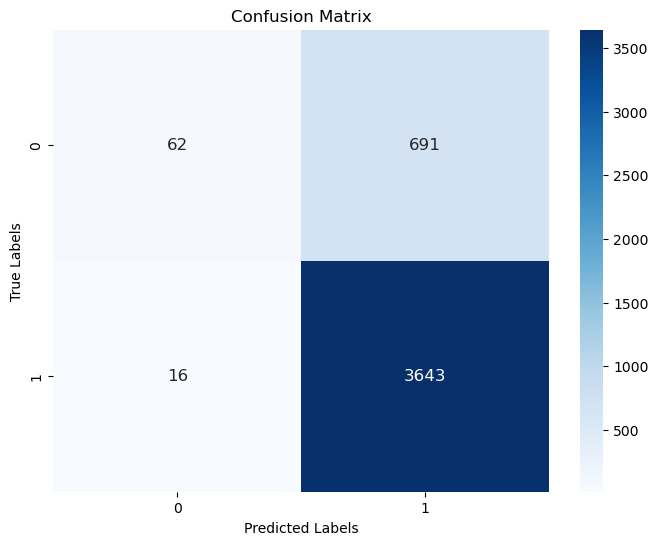

In [157]:
predicted_prob = moe_model.predict(x_val_reshaped_lstm)
y_pred_moe = np.argmax(predicted_prob, axis=1)
#y_pred_moe = moe_model.predict(x_val_reshaped_lstm)

# Compute the confusion matrix
cm = confusion_matrix( y_val.values.reshape(-1,1), y_pred_moe.reshape(-1,1))# for lstm y_val.values.reshape(-1,1), y_pred.reshape(-1,1) #for cnn y_val, y_pred
 
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [158]:
#import classification report
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_moe))

              precision    recall  f1-score   support

           0       0.79      0.08      0.15       753
           1       0.84      1.00      0.91      3659

    accuracy                           0.84      4412
   macro avg       0.82      0.54      0.53      4412
weighted avg       0.83      0.84      0.78      4412

